## ReportLab sample

In [2]:
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A4, portrait
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont

In [6]:
# ユーザのデスクトップのディレクトリを取得
file = "sample.pdf"
file_path = os.path.expanduser("~") + "/Desktop/" + file

# A4の新規PDFファイルを作成
page = canvas.Canvas(file_path, pagesize=portrait(A4))

# フォントの読み込み
pdfmetrics.registerFont(TTFont("HGRGE", "C:/Windows/Fonts/seguisym.ttf"))
pdfmetrics.registerFont(TTFont("HGRME", "C:/Windows/Fonts/seguisym.ttf"))

# フォントの設定(第1引数：フォント、第2引数：サイズ)
page.setFont("HGRGE", 20)

# 指定座標が左端となるように文字を挿入
page.drawString(0, 0, "Hello World!")

# 指定座標が中心となるように文字を挿入
page.drawCentredString(200, 200, "Hello World!")

# 指定座標が右端となるように文字を挿入
page.drawRightString(200, 100, "Hello World!")
# 改ページ
page.showPage()

page.drawString(200, 300, "reportlab")

# PDFファイルとして保存
page.save()


## Jinja2
- use 'HTML' format template
- create html files dynamicaly

### Ideal directory hierarchy
```
-----foo
    |
    ---templates
    |     |
    |     ---template.txt
    ---parameters
    |     |
    |     ---parameter.json
    |
    ---results
    |      |
    |      ---results.html
    |---this_script.py
```

In [9]:
import os
from jinja2 import Template, Environment, FileSystemLoader
import json

In [10]:
# Load template
os.makedirs('./templates', exist_ok=True)
env = Environment(loader=FileSystemLoader('./templates', encoding='utf8'))
template = env.get_template('sample_01.txt')
 
# Load parameters from a.json file 
with open('./templates/parameter_01.json') as f:
    parameters = json.load(f)

# Redering to the console
rendered = template.render(parameters)
print(rendered)
 
# Redering and publishing results
os.makedirs('./results', exist_ok=True)
rendered_html = template.render(parameters)
with open('./results/result_01.html', 'w') as f:
    f.write(rendered_html)

<html>
<h1> Dynamicaly create HTML documets by jinja2 </h1>
<h2> jinja2 test </h2>
Module jinja2.

<img src="../results/matplotlib_figure.png" alt="My test document" width="320px" height="240px">
<h3>I practice HTML programing.</h3>

<body>
    <table border="1" cellspacing="0" cellpadding="0">
        <tbody>
            <tr>
                <td style="text-align: center"><b>Date</b></td>
                <td colspan="13" style="text-align: center">2023-11-28</td>
            </tr>
            <tr>
                <td><b>number</b></td>
                
                    <td>0</td>
                
                    <td>1</td>
                
                    <td>2</td>
                
                    <td>3</td>
                
                    <td>4</td>
                
                    <td>5</td>
                
                    <td>6</td>
                
                    <td>7</td>
                
                    <td>8</td>
                
        

### Create parameters for .json format 

In [22]:
import json

str = {
    'name'      : 'Mark',
    'age'       : '25',
    'GodName1'  : 'Gauss',
    'GodName2'  : 'Netown',
    'GodName3'  : 'Laplace',
    'Role1'     : 'Mathmatician',
    'Role2'     : 'Physician',
    'Role3'     : 'Engineer'
}

os.makedirs('./templates', exist_ok=True)
with open('./templates/parameter_01.json', 'w') as f:
    json.dump(str, f, ensure_ascii=False)

- matplotlib 'figsize' default
    - width:4.8inch
    - height:6.4inch
    - dpi:100
    - width * dpi x height * dpi

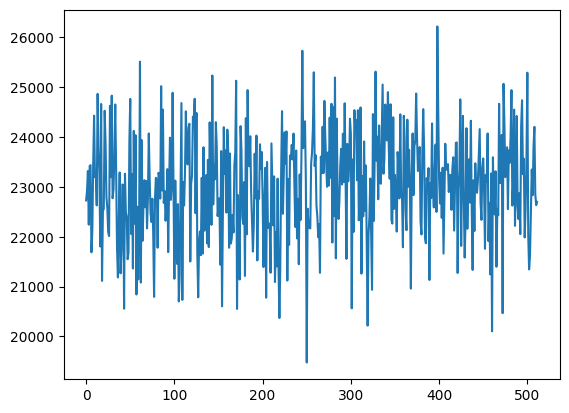

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

x = np.linspace(0, 511, 512)
img = cv2.imread('./data/image/img1.png', cv2.IMREAD_ANYDEPTH)
fig, ax = plt.subplots(figsize=())
ax.plot(x, img[0])
fig.savefig('./results/matplotlib_figure.png')
    